In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
train_df = pd.read_csv('training_data.csv')

In [3]:
train_df.columns

Index(['Open(t-4)', 'Open(t-3)', 'Open(t-2)', 'Open(t-1)', 'Open(t)',
       'High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)',
       'Low(t-4)', 'Low(t-3)', 'Low(t-2)', 'Low(t-1)', 'Low(t)',
       'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)',
       'Close_x(t)', 'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)',
       'Close_y(t-1)', 'Close_y(t)', 'Volume(t-4)', 'Volume(t-3)',
       'Volume(t-2)', 'Volume(t-1)', 'Volume(t)', 'Average_Likes(t-4)',
       'Average_Likes(t-3)', 'Average_Likes(t-2)', 'Average_Likes(t-1)',
       'Average_Likes(t)', 'Tweets_Volume(t-4)', 'Tweets_Volume(t-3)',
       'Tweets_Volume(t-2)', 'Tweets_Volume(t-1)', 'Tweets_Volume(t)',
       'reddit_sentiment(t-4)', 'reddit_sentiment(t-3)',
       'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
       'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)',
       'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
       'twitter_sentiment(t)', 'roe', 'infl', 

## Preprocessing

### Generate Column Ordering

In [4]:
# time series columns
cols_series = ['Open', 'High', 'Low', 'Close_x', 'Close_y', 'Volume', 'Average_Likes', 'Tweets_Volume','reddit_sentiment', 'twitter_sentiment' ]
# uni value columns
cols_unival = ['roe', 'infl', 'Close_x1(t+1)']

In [5]:
col_order = []
cur = pd.Series(train_df.columns)

for col in cols_series:
    filtered = list(cur[cur.str.startswith(col)])
    if (col == 'Close_x'):
        filtered.remove('Close_x1(t+1)')
    col_order.extend(filtered)

col_order.extend(cols_unival)

In [6]:
col_order

['Open(t-4)',
 'Open(t-3)',
 'Open(t-2)',
 'Open(t-1)',
 'Open(t)',
 'High(t-4)',
 'High(t-3)',
 'High(t-2)',
 'High(t-1)',
 'High(t)',
 'Low(t-4)',
 'Low(t-3)',
 'Low(t-2)',
 'Low(t-1)',
 'Low(t)',
 'Close_x(t-4)',
 'Close_x(t-3)',
 'Close_x(t-2)',
 'Close_x(t-1)',
 'Close_x(t)',
 'Close_y(t-4)',
 'Close_y(t-3)',
 'Close_y(t-2)',
 'Close_y(t-1)',
 'Close_y(t)',
 'Volume(t-4)',
 'Volume(t-3)',
 'Volume(t-2)',
 'Volume(t-1)',
 'Volume(t)',
 'Average_Likes(t-4)',
 'Average_Likes(t-3)',
 'Average_Likes(t-2)',
 'Average_Likes(t-1)',
 'Average_Likes(t)',
 'Tweets_Volume(t-4)',
 'Tweets_Volume(t-3)',
 'Tweets_Volume(t-2)',
 'Tweets_Volume(t-1)',
 'Tweets_Volume(t)',
 'reddit_sentiment(t-4)',
 'reddit_sentiment(t-3)',
 'reddit_sentiment(t-2)',
 'reddit_sentiment(t-1)',
 'reddit_sentiment(t)',
 'twitter_sentiment(t-4)',
 'twitter_sentiment(t-3)',
 'twitter_sentiment(t-2)',
 'twitter_sentiment(t-1)',
 'twitter_sentiment(t)',
 'roe',
 'infl',
 'Close_x1(t+1)']

In [7]:
# Order the dataframe columns for scaling
train_df = train_df[col_order]

### Row MinMax Scaling

In [8]:
train_scaled = train_df.copy()

In [9]:
train_scaled.columns

Index(['Open(t-4)', 'Open(t-3)', 'Open(t-2)', 'Open(t-1)', 'Open(t)',
       'High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)',
       'Low(t-4)', 'Low(t-3)', 'Low(t-2)', 'Low(t-1)', 'Low(t)',
       'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)',
       'Close_x(t)', 'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)',
       'Close_y(t-1)', 'Close_y(t)', 'Volume(t-4)', 'Volume(t-3)',
       'Volume(t-2)', 'Volume(t-1)', 'Volume(t)', 'Average_Likes(t-4)',
       'Average_Likes(t-3)', 'Average_Likes(t-2)', 'Average_Likes(t-1)',
       'Average_Likes(t)', 'Tweets_Volume(t-4)', 'Tweets_Volume(t-3)',
       'Tweets_Volume(t-2)', 'Tweets_Volume(t-1)', 'Tweets_Volume(t)',
       'reddit_sentiment(t-4)', 'reddit_sentiment(t-3)',
       'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
       'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)',
       'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
       'twitter_sentiment(t)', 'roe', 'infl', 

In [10]:
# transformation dictionary to store each row's minimum value and range (max-min)
trform_list = {}

In [11]:
def minmaxscaler(index, row, in_size, num_var):
    trform_dict = {}
    trformed_row = []
    value = 0
    for i in range(num_var):
        cur = np.array(row[ i*in_size : (i+1)*in_size ])
        rowmaxmin = cur.max() - cur.min()
        print('rowmaxmin', rowmaxmin)
        rowmin = cur.min()
        print('rowmin', rowmin)
        trform_dict[i] = [rowmaxmin, rowmin]
        trform_list[index] = trform_dict
        cur = [ (x - rowmin) / (rowmaxmin) for x in cur]
        trformed_row.extend(cur)
        if (i == 3):
            target = row[-1]
            value = (target - rowmin) / rowmaxmin
    
    rest = np.array(row[ num_var*in_size : -1 ])
    trformed_row.extend(rest)
    trformed_row.append(value)
    return trformed_row
                    

In [12]:
for index, row in train_scaled.iterrows():
    trformed_row = minmaxscaler(index, row, 5, 8)
    train_scaled.loc[index] = trformed_row

rowmaxmin 4.386064828000329
rowmin 37.64469954219178
rowmaxmin 1.65090734192961
rowmin 41.35737127213854
rowmaxmin 4.66452364174642
rowmin 37.129117884311526
rowmaxmin 1.72845458984375
rowmin 40.82010269165039
rowmaxmin 86.31005859375
rowmin 2709.800048828125
rowmaxmin 465456000.0
rowmin 364944800.0
rowmaxmin 1.5851742151109245
rowmin 1.0555014605647517
rowmaxmin 2621.0
rowmin 4779.0
rowmaxmin 1.5074074219748042
rowmin 41.0629207043366
rowmaxmin 1.6066107300115746
rowmin 41.73314634803784
rowmaxmin 1.2168728441418253
rowmin 40.57676868191612
rowmaxmin 2.4664230346679688
rowmin 40.82010269165039
rowmaxmin 86.31005859375
rowmin 2709.800048828125
rowmaxmin 198640400.0
rowmin 364944800.0
rowmaxmin 0.24155930113495705
rowmin 0.864529838852488
rowmaxmin 868.0
rowmin 4779.0
rowmaxmin 2.4897590017422218
rowmin 41.0629207043366
rowmaxmin 3.8495720033273955
rowmin 41.73314634803784
rowmaxmin 2.417169543947253
rowmin 40.98307460171824
rowmaxmin 4.25848388671875
rowmin 41.234710693359375
rowmaxmin

rowmaxmin 7.7325344589349285
rowmin 63.16867833129293
rowmaxmin 7.238553878712011
rowmin 66.27196775028911
rowmaxmin 8.126249959944467
rowmin 62.67469808490916
rowmaxmin 8.040657043457031
rowmin 65.27422332763672
rowmaxmin 110.320068359375
rowmin 3135.9599609375
rowmaxmin 271125600.0
rowmin 431980400.0
rowmaxmin 1.7149234900918304
rowmin 1.1148895292987513
rowmaxmin 2063.0
rowmin 3910.0
rowmaxmin 7.639611404268507
rowmin 65.68506134569253
rowmaxmin 8.87212519865534
rowmin 68.66607787574924
rowmaxmin 7.654291064583049
rowmin 65.01500018749901
rowmaxmin 9.072654724121094
rowmin 68.43864440917969
rowmaxmin 96.679931640625
rowmin 3191.449951171875
rowmaxmin 271125600.0
rowmin 431980400.0
rowmaxmin 1.5704793512171344
rowmin 1.2593336681734473
rowmaxmin 3080.0
rowmin 3910.0
rowmaxmin 9.079989159458236
rowmin 68.36773556838317
rowmaxmin 8.434384016812487
rowmin 69.51220920052327
rowmaxmin 7.57847308817513
rowmin 68.12074168932355
rowmaxmin 8.493080139160156
rowmin 69.4510726928711
rowmaxmin 1

rowmaxmin 3375.0
rowmin 4572.0
rowmaxmin 9.944137855297882
rowmin 108.00766954937647
rowmaxmin 4.6390050902871
rowmin 115.5128728742382
rowmaxmin 6.901310738458747
rowmin 105.70294688474958
rowmaxmin 11.560684204101562
rowmin 107.13109588623048
rowmaxmin 316.669921875
rowmin 3310.239990234375
rowmaxmin 289008400.0
rowmin 406474900.0
rowmaxmin 2.550865100077487
rowmin 2.1921751120303345
rowmaxmin 3421.0
rowmin 4526.0
rowmaxmin 11.384626853173572
rowmin 108.00766954937647
rowmaxmin 3.847872671190757
rowmin 119.05682994741308
rowmaxmin 11.313982471116589
rowmin 107.09168229524737
rowmaxmin 9.767662048339844
rowmin 112.3280029296875
rowmaxmin 141.4599609375
rowmin 3550.5
rowmaxmin 234745300.0
rowmin 406474900.0
rowmaxmin 2.550865100077487
rowmin 2.1921751120303345
rowmaxmin 1974.0
rowmin 4526.0
rowmaxmin 10.320162775669985
rowmin 112.38721752432348
rowmaxmin 5.209422629603182
rowmin 119.05682994741308
rowmaxmin 7.458937067855288
rowmin 111.08485648919677
rowmaxmin 9.767662048339844
rowmin 

rowmin 344705100.0
rowmaxmin 2.1894569172191405
rowmin 4.248696277647905
rowmaxmin 2013.0
rowmin 5563.0
rowmaxmin 7.454327273008403
rowmin 138.27186697688904
rowmaxmin 5.382588794835073
rowmin 143.4859208499389
rowmaxmin 8.20770586785548
rowmin 137.06251391336127
rowmaxmin 9.41705322265625
rowmin 137.92491149902344
rowmaxmin 266.02001953125
rowmin 4300.4599609375
rowmaxmin 159769900.0
rowmin 305822700.0
rowmaxmin 1.5362451109905075
rowmin 4.248696277647905
rowmaxmin 1098.0
rowmin 5563.0
rowmaxmin 9.754061464873757
rowmin 138.27186697688904
rowmaxmin 8.34646989785341
rowmin 143.4859208499389
rowmaxmin 8.20770586785548
rowmin 137.06251391336127
rowmaxmin 9.7342529296875
rowmin 137.92491149902344
rowmaxmin 313.2099609375
rowmin 4300.4599609375
rowmaxmin 159769900.0
rowmin 305822700.0
rowmaxmin 2.140448069107453
rowmin 4.5869526991383855
rowmaxmin 2193.0
rowmin 5627.0
rowmaxmin 9.754061464873757
rowmin 138.27186697688904
rowmaxmin 8.286990139669399
rowmin 143.54540060812292
rowmaxmin 10.19

rowmin 3924.260009765625
rowmaxmin 107591200.0
rowmin 311481800.0
rowmaxmin 3.8695154350973016
rowmin 3.635606137587644
rowmaxmin 839.0
rowmin 9443.0
rowmaxmin 16.258151676885802
rowmin 155.97272672349237
rowmaxmin 15.560380652654487
rowmin 160.02978252222815
rowmaxmin 18.710342043388493
rowmin 147.8984617191865
rowmaxmin 13.04840087890625
rowmin 153.98904418945312
rowmaxmin 238.100341796875
rowmin 3899.889892578125
rowmaxmin 233374300.0
rowmin 311481800.0
rowmaxmin 1.548016193774489
rowmin 3.635606137587644
rowmaxmin 839.0
rowmin 9443.0
rowmaxmin 13.636513443286617
rowmin 152.91247913098894
rowmaxmin 12.270856604613158
rowmin 158.2355198371544
rowmaxmin 11.41360987138603
rowmin 147.8984617191865
rowmaxmin 12.6197509765625
rowmin 150.2908477783203
rowmaxmin 455.3701171875
rowmin 3655.0400390625
rowmaxmin 233374300.0
rowmin 311481800.0
rowmaxmin 1.6083914614519723
rowmin 3.635606137587644
rowmaxmin 553.0
rowmin 9443.0
rowmaxmin 9.360150773695693
rowmin 152.25459033326743
rowmaxmin 9.509

In [13]:
trform_list

{0: {0: [4.386064828000329, 37.64469954219178],
  1: [1.65090734192961, 41.35737127213854],
  2: [4.66452364174642, 37.129117884311526],
  3: [1.72845458984375, 40.82010269165039],
  4: [86.31005859375, 2709.800048828125],
  5: [465456000.0, 364944800.0],
  6: [1.5851742151109245, 1.0555014605647517],
  7: [2621.0, 4779.0]},
 1: {0: [1.5074074219748042, 41.0629207043366],
  1: [1.6066107300115746, 41.73314634803784],
  2: [1.2168728441418253, 40.57676868191612],
  3: [2.4664230346679688, 40.82010269165039],
  4: [86.31005859375, 2709.800048828125],
  5: [198640400.0, 364944800.0],
  6: [0.24155930113495705, 0.864529838852488],
  7: [868.0, 4779.0]},
 2: {0: [2.4897590017422218, 41.0629207043366],
  1: [3.8495720033273955, 41.73314634803784],
  2: [2.417169543947253, 40.98307460171824],
  3: [4.25848388671875, 41.234710693359375],
  4: [57.33984375, 2775.60009765625],
  5: [244424400.0, 364944800.0],
  6: [0.24155930113495705, 0.864529838852488],
  7: [2272.0, 4779.0]},
 3: {0: [4.51012

In [14]:
train_scaled

,Open(t-4),Open(t-3),Open(t-2),Open(t-1),Open(t),High(t-4),High(t-3),High(t-2),High(t-1),High(t),...,reddit_sentiment(t-1),reddit_sentiment(t),twitter_sentiment(t-4),twitter_sentiment(t-3),twitter_sentiment(t-2),twitter_sentiment(t-1),twitter_sentiment(t),roe,infl,Close_x1(t+1)
0,0.000000,0.912385,0.800851,0.779337,1.000000,0.000000,0.570608,0.227617,0.724460,1.000000,...,0.000000,0.000000,0.127374,0.256366,0.244529,0.207746,0.318402,0.109210,0.190660,1.426953
1,0.387128,0.062601,0.000000,0.642058,1.000000,0.352448,0.000000,0.510541,0.793678,1.000000,...,0.000000,0.000000,0.256366,0.244529,0.207746,0.318402,0.206934,0.109210,0.237069,1.894684
2,0.037901,0.000000,0.388730,0.605443,1.000000,0.000000,0.213073,0.331240,0.417348,1.000000,...,0.000000,0.000000,0.244529,0.207746,0.318402,0.206934,0.247462,0.109210,0.283478,1.040911
3,0.000000,0.214593,0.334227,0.552037,1.000000,0.000000,0.086161,0.148946,0.573785,1.000000,...,0.000000,0.000000,0.207746,0.318402,0.206934,0.247462,0.230397,0.109210,0.329887,1.172295
4,0.000000,0.124233,0.350416,0.815599,1.000000,0.000000,0.068705,0.533599,1.000000,0.758777,...,0.000000,0.000000,0.318402,0.206934,0.247462,0.230397,0.148224,0.109210,0.376296,1.575699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.654363,1.000000,0.000000,0.819390,0.535622,1.000000,0.705909,0.000000,0.475631,0.222729,...,0.000000,0.000000,0.170015,0.066024,0.093421,0.091963,0.043767,0.504836,0.367535,0.551543
196,1.000000,0.000000,0.819390,0.535622,0.269198,1.000000,0.000000,0.673784,0.315520,0.130279,...,0.000000,0.152096,0.066024,0.093421,0.091963,0.043767,0.068209,0.528813,0.304319,0.604801
197,0.000000,1.000000,0.653684,0.328535,0.563930,0.473767,1.000000,0.720192,0.575517,0.000000,...,0.152096,0.158785,0.093421,0.091963,0.043767,0.068209,0.222123,0.528813,0.202989,-2.918726
198,1.000000,0.484239,0.000000,0.350569,0.657000,1.000000,0.720192,0.575517,0.000000,0.424484,...,0.158785,0.000000,0.091963,0.043767,0.068209,0.222123,0.105450,0.528813,0.101658,-0.032608


## Training

In [15]:
score_df = pd.DataFrame(columns=['gs_cv', 'data', "MAE", "MSE", "RMSE", "R2"])

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_scaled.drop('Close_x1(t+1)',axis=1), train_scaled['Close_x1(t+1)'] ,
                                   random_state=88, 
                                   test_size=0.25, 
                                   shuffle=False)

In [17]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

### XGBoost without Grid Search

In [18]:
# Training without GridSearch and CV
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Accuracy on Test Data (Last 50 Days)

In [19]:
pred = model.predict(X_test)
pred_trformed = [pred[x - y_test.index[0]] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]
y_trformed =  [y_test[x] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]

mae = mean_absolute_error(y_trformed, pred_trformed)
mse = mean_squared_error(y_trformed, pred_trformed)
rmse = mean_squared_error(y_trformed, pred_trformed, squared=False)
r2 = r2_score(y_trformed, pred_trformed)
score_df.loc[len(score_df)] = [False, 'test', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   

Mean Absolute Error: 7.94129003333147
Mean Squared Error: 92.61182484325116
Root Mean Squared Error: 9.623503771665035
R-squared: 0.4085841132517588


<AxesSubplot:>

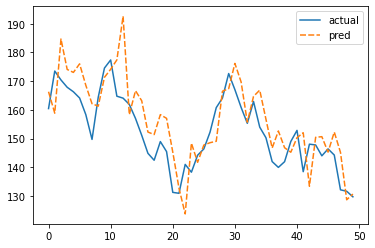

In [20]:
output = pd.DataFrame({'actual': np.array(y_trformed), 'pred': np.array(pred_trformed)})

sns.lineplot(data=output)

### Accuracy on the Complete Data (200 days)

In [21]:
validation_pred = model.predict(train_scaled.drop('Close_x1(t+1)',axis=1))
validation_y = train_scaled['Close_x1(t+1)']
v_pred_trformed = [ validation_pred[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]
v_y_trformed = [ validation_y[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]

mae = mean_absolute_error(v_y_trformed, v_pred_trformed)
mse = mean_squared_error(v_y_trformed, v_pred_trformed)
rmse = mean_squared_error(v_y_trformed, v_pred_trformed, squared=False)
r2 = r2_score(v_y_trformed, v_pred_trformed)
score_df.loc[len(score_df)] = [False, 'all', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   


Mean Absolute Error: 2.206494945437115
Mean Squared Error: 33.3007280208542
Root Mean Squared Error: 5.7706782981599485
R-squared: 0.9792956900051156


<AxesSubplot:>

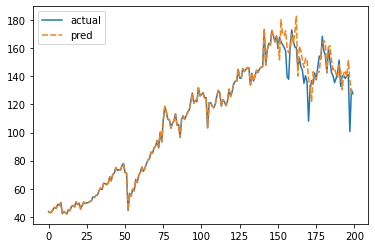

In [22]:
output = pd.DataFrame({'actual': v_y_trformed, 'pred': v_pred_trformed })
sns.lineplot(data=output)

### XGBoost with GridSearch

In [23]:
# Training with GridSearch CV to find best parameters
# Commented out due to long run time
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error
# from sklearn.utils import shuffle


# # Define parameter grid for GridSearchCV
# param_grid = {
#     'max_depth': [1,3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [50, 100, 200],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
# }

# # Define XGBoost model
# model = xgb.XGBRegressor(objective='reg:squarederror')

# # Perform grid search
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Print results
# print(f'Best parameters: {grid_search.best_params_}')
# print(f'Best score: {grid_search.best_score_}')

# # Use best model to make predictions
# best_model = grid_search.best_estimator_
# predictions = best_model.predict(X_test)

# # Calculate mean squared error
# mse = mean_squared_error(y_test, predictions)
# print(f'Mean squared error: {mse}')

In [24]:
#Best Parameters and model score
#Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 1.0}
# Best score: -0.3857488073297765
# Mean squared error: 0.5214391717888258

In [25]:
from xgboost import XGBRegressor

best_model = XGBRegressor(colsample_bytree= 1.0, gamma= 0, learning_rate= 0.01, max_depth= 1, min_child_weight= 5, n_estimators= 200, subsample= 1.0)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Accuracy on Test Data (Last 50 Days)

In [26]:
pred = best_model.predict(X_test)
pred_trformed = [pred[x - y_test.index[0]] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]
y_trformed =  [y_test[x] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]

mae = mean_absolute_error(y_trformed, pred_trformed)
mse = mean_squared_error(y_trformed, pred_trformed)
rmse = mean_squared_error(y_trformed, pred_trformed, squared=False)
r2 = r2_score(y_trformed, pred_trformed)
score_df.loc[len(score_df)] = [True, 'test', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   

Mean Absolute Error: 7.388987834681134
Mean Squared Error: 68.11317348185325
Root Mean Squared Error: 8.253070548702055
R-squared: 0.5650316472849141


<AxesSubplot:>

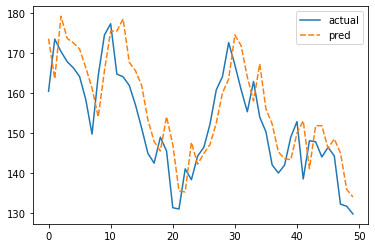

In [27]:
output = pd.DataFrame({'actual': np.array(y_trformed), 'pred': np.array(pred_trformed)})

sns.lineplot(data=output)

### Accuracy on the Complete Data (200 days)

In [28]:
validation_pred = best_model.predict(train_scaled.drop('Close_x1(t+1)',axis=1))
validation_y = train_scaled['Close_x1(t+1)']
v_pred_trformed = [ validation_pred[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]
v_y_trformed = [ validation_y[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]

mae = mean_absolute_error(v_y_trformed, v_pred_trformed)
mse = mean_squared_error(v_y_trformed, v_pred_trformed)
rmse = mean_squared_error(v_y_trformed, v_pred_trformed, squared=False)
r2 = r2_score(v_y_trformed, v_pred_trformed)
score_df.loc[len(score_df)] = [True, 'all', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   


Mean Absolute Error: 4.339050668359416
Mean Squared Error: 45.277242636081965
Root Mean Squared Error: 6.728836648045631
R-squared: 0.9718494422505124


<AxesSubplot:>

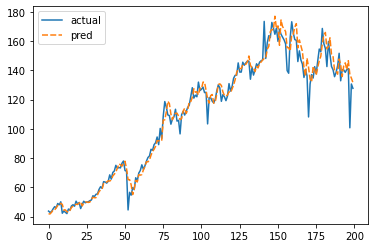

In [29]:
output = pd.DataFrame({'actual': v_y_trformed, 'pred': v_pred_trformed })
sns.lineplot(data=output)

In [30]:
score_df

,gs_cv,data,MAE,MSE,RMSE,R2
0,False,test,7.941290,92.611825,9.623504,0.408584
1,False,all,2.206495,33.300728,5.770678,0.979296
2,True,test,7.388988,68.113173,8.253071,0.565032
3,True,all,4.339051,45.277243,6.728837,0.971849
